In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from auto_encoder import Autoencoder

In [2]:
# 1. Charger et prétraiter les données
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# 3. Initialiser le modèle, la loss et l'optimiseur
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()  # Calculer la perte entre les images originales et reconstruites
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
# 4. Entraîner le modèle
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        images = images.view(images.size(0), -1)  # Aplatir les images
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, images)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {train_loss:.4f}")

Epoch 1/10, Loss: 0.0479
Epoch 2/10, Loss: 0.0251
Epoch 3/10, Loss: 0.0200
Epoch 4/10, Loss: 0.0173
Epoch 5/10, Loss: 0.0158
Epoch 6/10, Loss: 0.0145
Epoch 7/10, Loss: 0.0132
Epoch 8/10, Loss: 0.0122
Epoch 9/10, Loss: 0.0114
Epoch 10/10, Loss: 0.0108


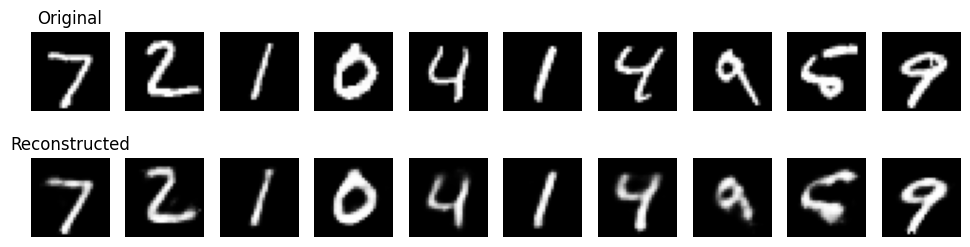

In [5]:
# 5. Visualiser les reconstructions
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        images = images.view(images.size(0), -1)
        outputs = model(images)
        # Rendre les images dans leur format original
        outputs = outputs.view(-1, 1, 28, 28).cpu().numpy()
        images = images.view(-1, 1, 28, 28).cpu().numpy()
        break  # On teste sur le premier batch uniquement

# Afficher les images originales et reconstruites
fig, axes = plt.subplots(2, 10, figsize=(12, 3))
for i in range(10):
    # Images originales
    axes[0, i].imshow(images[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")
    # Images reconstruites
    axes[1, i].imshow(outputs[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstructed")
plt.show()